# Analyse Exploratoire du fichier myreport_reseau_full.csv

### Imports (fichier & modules)

In [4]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [2]:
# pour connaitre le repertoire dans lequelle on est
!pwd


/Users/echo/home/3.cours/centraleSupelec/code/smartETL/notebook


In [3]:
tab = pda.read_csv('../data/241016_LogETL.csv',sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '../Data/241016_LogETL.csv'

### Le fichier 241016_LogETL.csv : taille, colonnes

In [3]:
tab.shape

(171489, 28)

Il y a 171 489 lignes et 28 colonnes dans le dataframe. 

In [4]:
tab.columns

Index(['Server version', 'Client version', 'Model', 'Type', 'Insert mode',
       'Rows added', 'Rows updated', 'Rows deleted', 'Rows in error',
       'Rows in warning', 'Columns', 'Date', 'Start time', 'End  time',
       'Duration', 'Machine', 'Session', 'Project name', 'Product', 'Result',
       'ETL_StartDateTime', 'Launcher_Id', 'Launcher_Name', 'Program_Id',
       'Program_Name', 'Schedules_Id', 'Schedules_Name',
       'Schedules_StartDateTime'],
      dtype='object')

In [5]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171489 entries, 0 to 171488
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Server version           171489 non-null  object 
 1   Client version           171489 non-null  object 
 2   Model                    171489 non-null  object 
 3   Type                     171489 non-null  object 
 4   Insert mode              171489 non-null  object 
 5   Rows added               171489 non-null  int64  
 6   Rows updated             171489 non-null  int64  
 7   Rows deleted             171489 non-null  int64  
 8   Rows in error            0 non-null       float64
 9   Rows in warning          0 non-null       float64
 10  Columns                  171489 non-null  int64  
 11  Date                     171489 non-null  object 
 12  Start time               171489 non-null  object 
 13  End  time                171489 non-null  object 
 14  Dura

On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [6]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Server version                  5
Client version                  5
Model                         946
Type                            5
Insert mode                     4
Rows added                  67281
Rows updated                    2
Rows deleted                 4817
Rows in error                   0
Rows in warning                 0
Columns                        77
Date                          217
Start time                 171469
End  time                  171488
Duration                   170962
Machine                         1
Session                         1
Project name                    1
Product                         4
Result                          3
ETL_StartDateTime           10049
Launcher_Id                     8
Launcher_Name                   8
Program_Id                     45
Program_Name                   46
Schedules_Id                   41
Schedules_Name                 76
Schedules_StartDateTime      8098
dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [7]:
tab.head()


,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Product,Result,ETL_StartDateTime,Launcher_Id,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.0,6.0.0,TMS/MF_TrajetsNew,Modèle simple,Mise à jour données / Insertion données,36861,0,36642,NaN,NaN,...,MyReport Server BE,OK,2024-03-14 16:08:01,NaN,Serveur (programmation),ETL_b75838e4-8850-4d9a-ba25-4d541f4b237f,ETL Opti TMS 1h,ETLPROGRAMMATIONBG7G6W,ETL Opti TMS toutes les 1h Lun-Sam,2024-03-14 15:41:46
1,6.0.0,6.0.0,TMS/MF_FactureFournisseursSansDetails,Modèle simple,Mise à jour données / Insertion données,118,0,44,NaN,NaN,...,MyReport Server BE,OK,2024-03-14 16:20:23,NaN,Serveur (programmation),ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,2024-03-14 16:01:38
2,6.0.0,6.0.0,TMS/MF_FacturesSansDetails,Modèle simple,Mise à jour données / Insertion données,369,0,17,NaN,NaN,...,MyReport Server BE,OK,2024-03-14 16:20:23,NaN,Serveur (programmation),ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,2024-03-14 16:01:38
3,6.0.0,6.0.0,TMS/MF_SAV,Modèle simple,Mise à jour données / Insertion données,277,0,191,NaN,NaN,...,MyReport Server BE,OK,2024-03-14 16:20:23,NaN,Serveur (programmation),ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,2024-03-14 16:01:38
4,6.0.0,6.0.0,TMS/MF_FactureFournisseurs,Modèle simple,Mise à jour données / Insertion données,1036,0,428,NaN,NaN,...,MyReport Server BE,OK,2024-03-14 16:20:23,NaN,Serveur (programmation),ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,2024-03-14 16:01:38


## Regardons le détail par colonne

### Server version

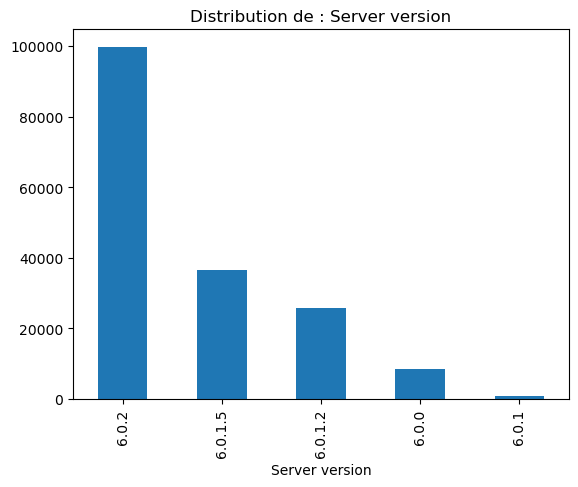

In [8]:
col= tab.columns[0]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

On peut supposer que les versions les plus élevées sont les plus récentes.

In [11]:
#plt.figure(figsize=(10, 3), layout='constrained')
#plt.plot(tab['Date'], tab['Server version'])
#plt.xlabel('date')
#plt.ylabel('occurences de server version')

##c'est pas la vue que je veux


t = np.zeros((len(tab['Date']),5))
for l in t:
    t[0]=tab['Server version][tab['Server version']=='6.0.2']

SyntaxError: invalid syntax (820021611.py, line 11)

### Client version

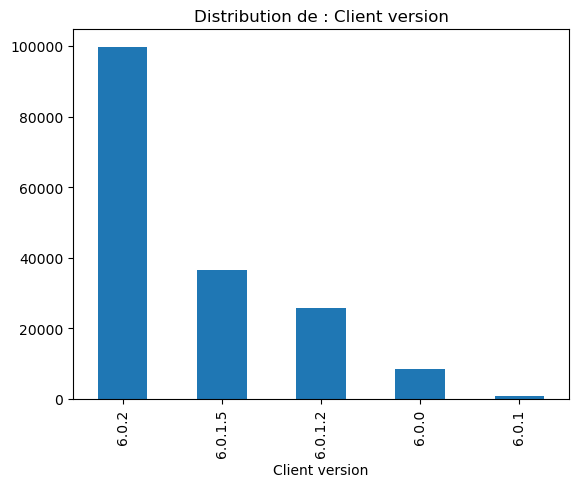

In [10]:
col= tab.columns[1]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Model

In [86]:
col= tab.columns[2]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Model


Model
TMS/MF_Exploit                                                     2544
TMS/MF_TrajetsNew                                                  2398
TMS/Chargement Jour Pointage/JP_Tournées                           2152
TMS/Chargement Jour Pointage/JP_Trajets                            2149
TMS/Chargement Jour Pointage/JP_Exploit                            2147
                                                                   ... 
WebServices/CEGID/338FTL34/Info Salarié/GetEmployment338FTL34         1
WebServices/CEGID/337PLOG/Info Salarié/GetEmployment337PLOG           1
WebServices/CEGID/346GUIDEZ/Info Salarié/GetEmployment346GUIDEZ       1
WebServices/CEGID/306TROYES/Info Salarié/GetAssignment306TROYES       1
WebServices/CEGID/318TOURS/Info Salarié/GetAssignment318TOURS         1
Name: count, Length: 946, dtype: int64

### Type

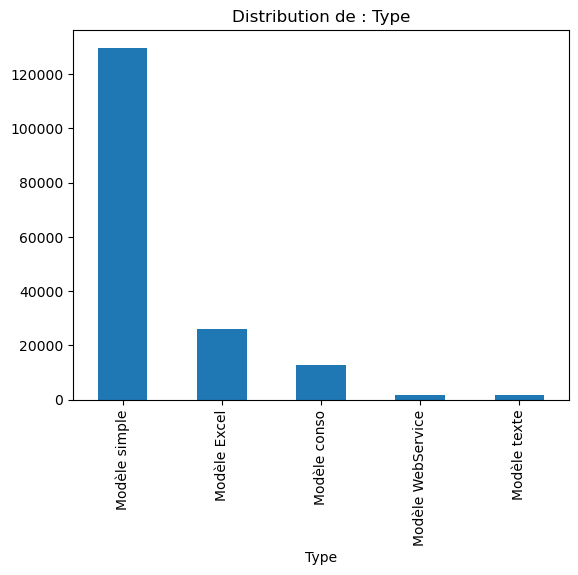

In [87]:
col= tab.columns[3]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Insert mode

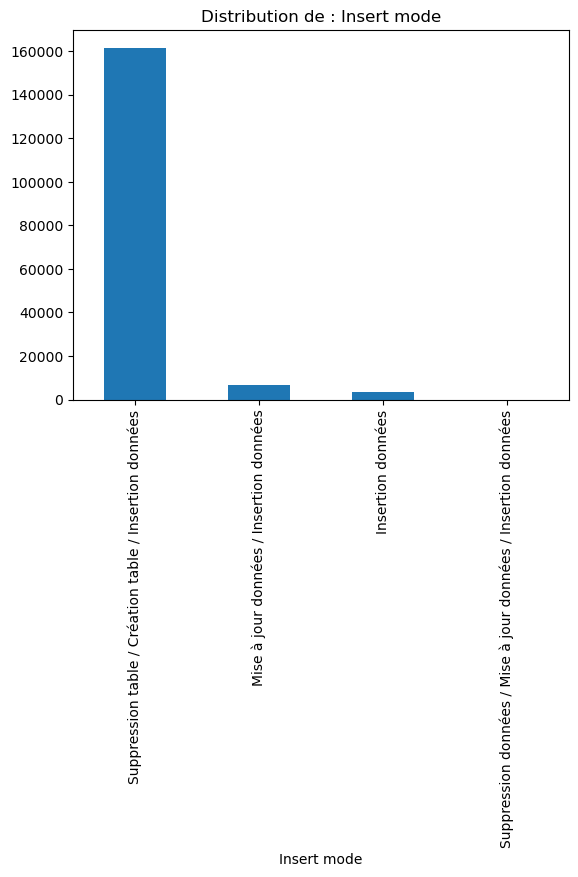

In [88]:
col= tab.columns[4]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Rows added

In [98]:
col= tab.columns[5]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Rows added


Rows added
0         2041
198       1555
34473     1555
23        1259
37        1135
          ... 
342627       1
432738       1
370030       1
1337         1
2337         1
Name: count, Length: 67281, dtype: int64

### Rows updated

In [100]:
col= tab.columns[6]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Rows updated


Rows updated
0     171488
41         1
Name: count, dtype: int64

A regarder

### Rows deleted

In [101]:
col= tab.columns[7]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Rows deleted


Rows deleted
0        164698
1           252
2            93
3            18
6            15
          ...  
148           1
2949          1
1844          1
3183          1
14108         1
Name: count, Length: 4817, dtype: int64

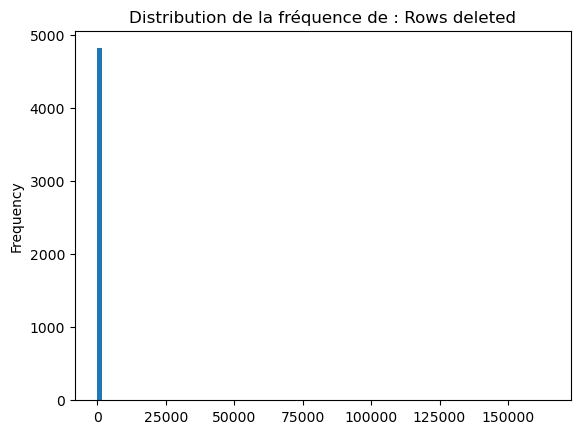

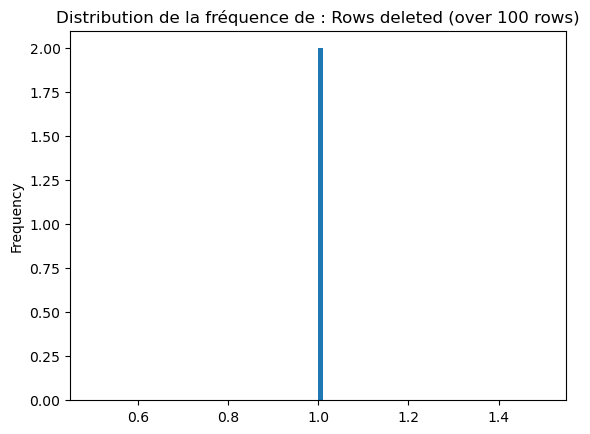

164698


In [118]:
col = tab.columns[7]
g = tab[col].value_counts().plot.hist(bins=100)
g.set_title('Distribution de la fréquence de : ' + col)
plt.show()

#on voit rien donc on filtre les valeurs =100
tab_rows_added = tab[col].value_counts()
tab_rows_added_not_null=tab_rows_added[tab_rows_added > 100]
g = tab_rows_added_not_null.value_counts().plot.hist(bins=100)
g.set_title('Distribution de la fréquence de : ' + col+" (over 100 rows)")
plt.show()

print(tab_rows_added[0])

### Columns

In [122]:
col= tab.columns[10]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Columns


Columns
6     15654
2     14911
4     12021
9      9593
7      9372
      ...  
1         3
54        3
55        3
81        2
84        1
Name: count, Length: 77, dtype: int64

### Date

In [124]:
col= tab.columns[11]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Date


Date
2024-09-30    1220
2024-08-12    1170
2024-10-01    1146
2024-10-15    1137
2024-10-02    1134
              ... 
2024-03-17     313
2024-08-11     291
2024-05-26     255
2024-03-14     205
2024-03-30     178
Name: count, Length: 217, dtype: int64

On voit qu'il y a des jours avec beaucoup de processus ETL, faudrait vérifier s'il y a une cadence hebdo/mensuelle

### Start time

In [125]:
col= tab.columns[12]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Start time


Start time
17:21:16.4816562    3
7:45:46.5308605     2
13:01:45.0516569    2
18:36:44.1065764    2
6:21:44.0681416     2
                   ..
8:22:22.3335157     1
8:22:17.9692299     1
8:22:17.9720551     1
8:22:22.3342029     1
15:02:22.693819     1
Name: count, Length: 171469, dtype: int64

### End  time

In [126]:
col= tab.columns[13]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : End  time


End  time
12:02:45.7096649    2
16:20:23.0609043    1
15:57:06.714479     1
15:22:47.8105281    1
15:24:00.693202     1
                   ..
7:23:39.0022218     1
8:22:21.4935065     1
8:22:21.7814267     1
8:22:22.3313416     1
15:02:58.6073524    1
Name: count, Length: 171488, dtype: int64

### Duration

In [127]:
col= tab.columns[14]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Duration


Duration
0:00:00            7
0:00:00.1277661    3
0:00:00.1290202    3
0:00:00.2633295    2
0:00:01.0333095    2
                  ..
0:01:07.2488017    1
0:01:09.9095667    1
0:01:14.7851844    1
0:00:09.8135365    1
0:00:35.9135338    1
Name: count, Length: 170962, dtype: int64

### Machine

In [128]:
col= tab.columns[15]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Machine


Machine
VDRREPORTFRONT    171489
Name: count, dtype: int64

Inutile de conserver cette colonne. 

### Session

In [129]:
col= tab.columns[16]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Session


Session
PRIMEVER\VDRREPORTFRONT$    171489
Name: count, dtype: int64

Inutile de conserver cette colonne.

### Project name

In [130]:
col= tab.columns[17]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Project name


Project name
MySystem BE    171489
Name: count, dtype: int64

Inutile de conserver cette colonne.

### Product

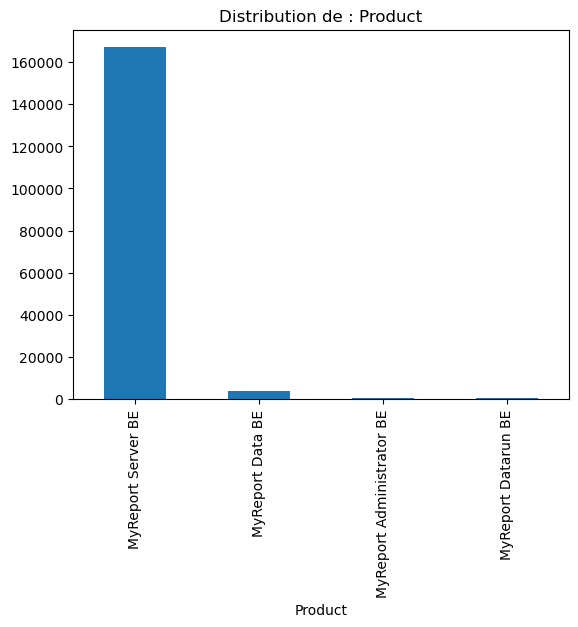

In [143]:
col= tab.columns[18]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Result

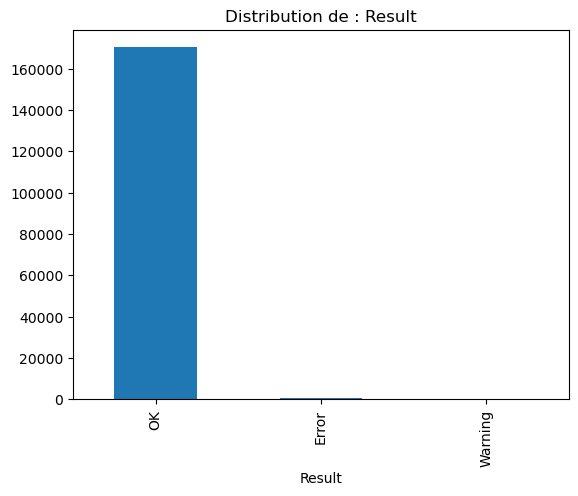

Result
OK         170341
Error         937
Warning       211
Name: count, dtype: int64

In [144]:
col= tab.columns[19]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()
tab[col].value_counts()

### ETL_StartDateTime

In [146]:
col= tab.columns[20]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : ETL_StartDateTime


ETL_StartDateTime
2024-09-22 23:32:25    412
2024-09-26 23:32:10    412
2024-10-14 23:32:28    412
2024-09-24 23:32:08    412
2024-10-15 23:31:49    412
                      ... 
2024-08-28 13:54:47      1
2024-08-28 16:01:50      1
2024-08-28 16:02:30      1
2024-06-04 11:45:28      1
2024-03-14 16:08:01      1
Name: count, Length: 10049, dtype: int64

### Launcher_Id

In [148]:
col= tab.columns[21]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Launcher_Id


Launcher_Id
S-1-5-21-2589306888-3505837791-2124457283-7091     1480
S-1-5-21-2589306888-3505837791-2124457283-6759     1405
USRQS3MO8                                           784
S-1-5-21-2589306888-3505837791-2124457283-11426     280
USR031M1N                                           225
S-1-5-21-2589306888-3505837791-2124457283-11554     150
S-1-5-21-2589306888-3505837791-2124457283-9296      100
S-1-5-21-2589306888-3505837791-2124457283-9503       39
Name: count, dtype: int64

### Launcher_Name

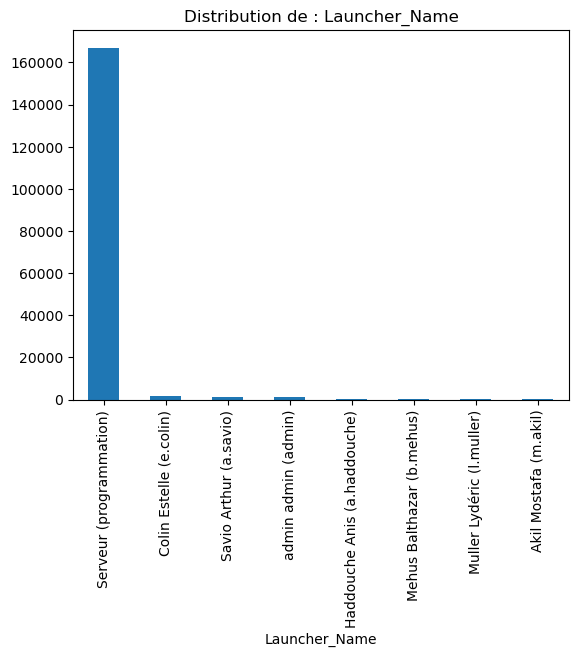

Distribution de : Launcher_Name


Launcher_Name
Serveur (programmation)         167026
Colin Estelle (e.colin)           1480
Savio Arthur (a.savio)            1405
admin admin (admin)               1009
Haddouche Anis (a.haddouche)       280
Mehus Balthazar (b.mehus)          150
Muller Lydéric (l.muller)          100
Akil Mostafa (m.akil)               39
Name: count, dtype: int64

In [149]:
col= tab.columns[22]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()
print('Distribution de : '+col)
tab[col].value_counts()

Launcher_Name est identifié par Launcher_Id.

### Program_Id

In [155]:
col= tab.columns[23]
print('Distribution de : '+col)
print("nb de prog_ID différents : "+str(len(tab[col].value_counts())))
tab[col].value_counts()

Distribution de : Program_Id
nb de prog_ID différents : 45


Program_Id
ETL_3a685d15-3172-4faf-92e5-4b0918f6b315    81239
ETL_c26fe470-8e3c-4769-8e8d-d9933d76b5e3    37639
ETL_0b46e480-7c18-4ecc-92c2-bc0565594aec    20450
ETL_e40758d2-53ad-48a5-86e9-07bc4b2c582d     8178
ETL_b75838e4-8850-4d9a-ba25-4d541f4b237f     4183
ETL_49d4f3b4-07e8-418e-b150-a1e69e67a8b4     3888
ETL_d1da20f7-31ab-47e1-a567-cc53b1d0eb5a     1740
ETL_8cc602ee-da88-4b2e-8d49-5efb2b923427     1596
ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285     1407
ETL_d0edf2d1-8143-4116-8aaf-61ed24492bed     1246
ETL_378a6a4f-509d-4915-b142-9e7b952d4a5f      804
ETL_184250a2-a0a3-425a-b5b5-cad900e2b012      757
ETL_a9fea71d-ab8f-482f-942a-a8449eec9dc9      705
ETL_a572d2ea-0985-46ae-906b-811323ae597d      600
ETL_5fa2e93e-830a-48f7-a255-84d88e0e95e3      521
ETL_35f084e3-349b-4823-9358-3ecc77286cbf      500
ETL_a8081584-cb4c-4157-83b6-395dd0f07687      331
ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0      246
ETL_60d6d6d9-7188-43ef-8b00-31a8c3f8f6ac      197
ETL_dff48516-56ce-4156-914c-8d68c6a408f

### Program_Name

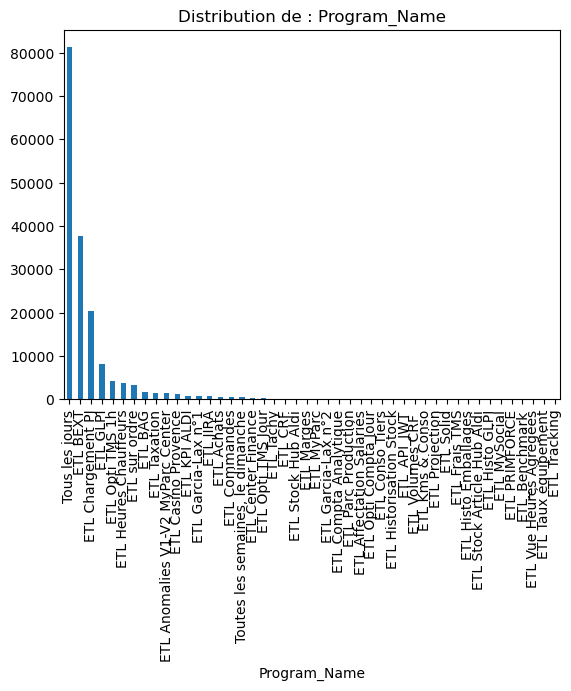

Distribution de : Program_Name
nb de prog_Name différents : 46


Program_Name
Tous les jours                       81239
ETL BEXT                             37639
ETL Chargement PJ                    20450
ETL GLPI                              8178
ETL Opti TMS 1h                       4183
ETL Heures Chauffeurs                 3888
ETL sur ordre                         3357
ETL BAG                               1740
ETL Taxation                          1596
ETL Anomalies V1-V2 MyParc Center     1407
ETL Casino Provence                   1246
ETL KPI ALDI                           804
ETL Garcia-Lax n°1                     757
ETL JIRA                               705
ETL Achats                             600
ETL Commandes                          521
Toutes les semaines, le dimanche       500
ETL Center Finance                     331
ETL Opti TMS Jour                      246
ETL Tachy                              197
ETL CRF                                179
ETL Stock Hub Aldi                     179
ETL Marges                             14

In [161]:
col= tab.columns[24]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()
print('Distribution de : '+col)
print("nb de prog_Name différents : "+str(len(tab[col].value_counts())))
tab[col].value_counts()

Program_Name est identifié par Program_Id.

### Schedules_Id

In [162]:
col= tab.columns[25]
print("nb de Schedules_ID différents : "+str(len(tab[col].value_counts())))
print('Distribution de : '+col)
tab[col].value_counts()

nb de Schedules_ID différents : 41
Distribution de : Schedules_Id


Schedules_Id
ETLPROGRAMMATIONCYZ21D     81239
ETLPROGRAMMATIONUMW9SE     13032
ETLPROGRAMMATION72H0KT      8514
ETLPROGRAMMATIONC32E9W      6373
ETLPROGRAMMATIONFUKXIQ      4347
ETLPROGRAMMATIONB1EHKQ      4345
ETLPROGRAMMATIONCSZ2HA      4345
ETLPROGRAMMATIONAX4T3X      4231
ETLPROGRAMMATIONQOOXE1      3603
ETLPROGRAMMATIONTXGWGU      3436
ETLPROGRAMMATIONUW02UH      3358
ETLPROGRAMMATION25EQ88      3081
ETLPROGRAMMATIONEQC5VO      2945
ETLPROGRAMMATION4MNN4Q      2943
ETLPROGRAMMATIONWCLOA6      2195
ETLPROGRAMMATIONVWRS6W      2117
ETLPROGRAMMATIONFIXZOW      1999
ETLPROGRAMMATIONE4IMDH      1693
ETLPROGRAMMATIONO7UZMD      1680
ETLPROGRAMMATIONSRNVED      1483
ETLPROGRAMMATIONU5MMFJ      1277
ETLPROGRAMMATIONBG7G6W      1102
ETLPROGRAMMATION186OR9       930
ETLPROGRAMMATIONLLS5PG       902
ETLPROGRAMMATION20I8B08      888
ETLPROGRAMMATIONM6OY4F       804
ETLPROGRAMMATION6BMEVB       726
ETLPROGRAMMATIONAE3L45       576
ETLPROGRAMMATIONIQGSSX       521
ETLPROGRAMMATIONNR50Q4       5

### Schedules_Name

In [163]:
col= tab.columns[26]
print("nb de Schedules_Name différents : "+str(len(tab[col].value_counts())))
print('Distribution de : '+col)
tab[col].value_counts()

nb de Schedules_Name différents : 76
Distribution de : Schedules_Name


Schedules_Name
ETL Jour 23h30                                                      81239
ETL BEXT Lun-Sam Intermédiaire 11h-13h                              13032
ETL - Messenger Quotidien Lun-Sam Ponctualité Partie 1 6h30-9h30     6353
ETL - Messenger Quotidien Lun-Sam 13h                                4211
Messenger Quotidien Lun-Sam 15h ALDI                                 3191
                                                                    ...  
ETL Hebdo Dim 16h                                                      17
ETL Opti TMS toutes les 1h Lun-Sam 08h40-13h40                          8
ETL Opti TMS toutes les 30m Lun-Sam 14h50-16h50                         6
Messenger 10 du Mois 07h                                                6
ETL + Messenger Bext Lun - Sam 22h55                                    4
Name: count, Length: 76, dtype: int64

### Schedules_StartDateTime

In [141]:
col= tab.columns[27]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Schedules_StartDateTime


Schedules_StartDateTime
2024-09-24 23:31:59    412
2024-09-23 23:32:15    412
2024-10-15 23:31:39    412
2024-09-21 23:32:00    412
2024-09-22 23:32:14    412
                      ... 
2024-07-29 07:17:17      1
2024-04-15 11:32:00      1
2024-07-26 18:03:37      1
2024-07-26 16:30:53      1
2024-03-14 15:41:46      1
Name: count, Length: 8098, dtype: int64

In [164]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Server version                  5
Client version                  5
Model                         946
Type                            5
Insert mode                     4
Rows added                  67281
Rows updated                    2
Rows deleted                 4817
Rows in error                   0
Rows in warning                 0
Columns                        77
Date                          217
Start time                 171469
End  time                  171488
Duration                   170962
Machine                         1
Session                         1
Project name                    1
Product                         4
Result                          3
ETL_StartDateTime           10049
Launcher_Id                     8
Launcher_Name                   8
Program_Id                     45
Program_Name                   46
Schedules_Id                   41
Schedules_Name                 76
Schedules_StartDateTime      8098
dtype: int64
